In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data=pd.read_csv("C:/Users/usnis/OneDrive/Masaüstü/Python_Workspace/kanser.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["id", "Unnamed: 32"],inplace=True,axis=1)

In [5]:
M= data[data.diagnosis=="M"]
B= data[data.diagnosis=="B"]

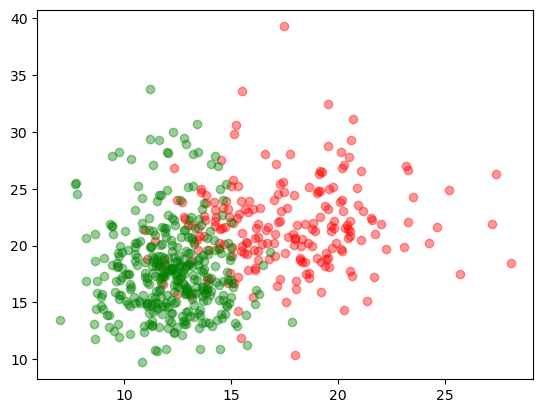

In [6]:
plt.scatter(M.radius_mean, M.texture_mean, color="red", label="Kötü",alpha=0.4)
plt.scatter(B.radius_mean, B.texture_mean, color="green", label="İyi",alpha=0.4)

In [7]:
data.diagnosis=[1 if each =="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x=data.drop(["diagnosis"],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=36)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain1=sc.fit_transform(xtrain)
xtest1=sc.transform(xtest)

In [15]:
from sklearn.svm import SVC
sv=SVC()

In [16]:
sv.fit(xtrain1,ytrain)                                                                      

SVC()

In [19]:
yhead=sv.predict(xtest1)

In [22]:
sv.score(xtest1,ytest)

0.9824561403508771

In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yhead)

In [24]:
cm

array([[75,  0],
       [ 2, 37]], dtype=int64)

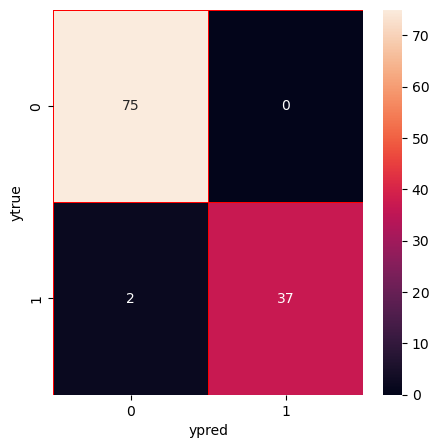

In [27]:
import seaborn as sns
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5, linecolor="red", ax=ax)
plt.xlabel("ypred")
plt.ylabel("ytrue")
plt.show()

In [28]:
#decision tree classifier


In [32]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=4, random_state=42)

In [33]:
dc.fit(xtrain1,ytrain)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [34]:
dc.score(xtest1,ytest)

0.956140350877193

In [37]:
yhead=dc.predict(xtest)

C:\Users\usnis\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yhead)

In [39]:
cm

array([[74,  1],
       [10, 29]], dtype=int64)

In [41]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=33)

In [42]:
rm.fit(xtrain1,ytrain)

RandomForestClassifier(max_depth=5, random_state=33)

In [43]:
rm.score(xtest1,ytest)

0.9649122807017544

In [44]:
yhead=rm.predict(xtest1)

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yhead)
cm

array([[73,  2],
       [ 2, 37]], dtype=int64)

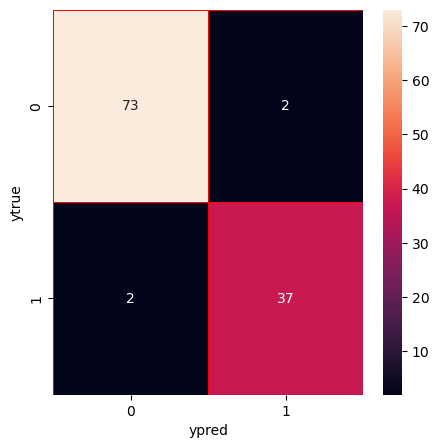

In [46]:
import seaborn as sns
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5, linecolor="red", ax=ax)
plt.xlabel("ypred")
plt.ylabel("ytrue")
plt.show()

In [53]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=50,random_state=33,max_depth=3)

In [54]:
gb.fit(xtrain1,ytrain)

GradientBoostingClassifier(n_estimators=50, random_state=33)

In [55]:
yhead=gb.predict(xtest1)

In [56]:
gb.score(xtest1,ytest)

0.9912280701754386

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yhead)
cm

array([[75,  0],
       [ 1, 38]], dtype=int64)

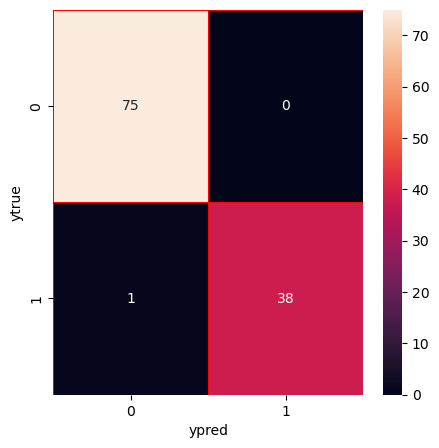

In [58]:
import seaborn as sns
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5, linecolor="red", ax=ax)
plt.xlabel("ypred")
plt.ylabel("ytrue")
plt.show()

In [59]:
from sklearn.naive_bayes import GaussianNB 
#from sklearn.naive_bayes import Multinal
#from sklearn.naive_bayes import BernoulliNb
nb=GaussianNB()

In [60]:
nb.fit(xtrain1,ytrain)

GaussianNB()

In [61]:
yhead=nb.predict(xtest1)

In [62]:
nb.score(xtest1,ytest)

0.9473684210526315

In [63]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,yhead)
cm

array([[74,  1],
       [ 5, 34]], dtype=int64)

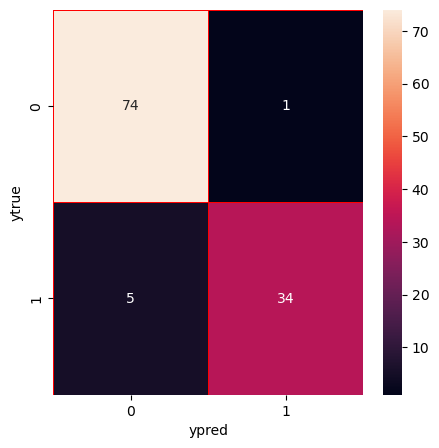

In [64]:
import seaborn as sns
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5, linecolor="red", ax=ax)
plt.xlabel("ypred")
plt.ylabel("ytrue")
plt.show()